# Step-1: Importing Packages

In [1]:
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt
import pandas_datareader
import pandas as pd
import datetime as dt
from sklearn.linear_model import LinearRegression
from pandas_datareader import data as pdr
import yfinance as yf

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

## Step-2: Extracting Data from Alpha Vantage

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta(days=2000)
start, end

(datetime.datetime(2017, 10, 30, 11, 29, 43, 358573),
 datetime.datetime(2023, 4, 22, 11, 29, 43, 358573))

## MACD Cross Over Buy or Sell signal

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define a list of ticker symbols
tickers = ['TQQQ', 'UPRO', 'SOXL']

# Loop over the tickers
for ticker in tickers:

    # Download data for the current ticker
    SnP = yf.download(ticker, start="2019-01-01", end=end)

    # Compute MACD
    def compute_macd(df, slow=26, fast=12, smooth=9):
        exp1 = df['Adj Close'].ewm(span = fast, adjust=False).mean()
        exp2 = df['Adj Close'].ewm(span = slow, adjust=False).mean()
        macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Adj Close': 'MACD'})
        signal = pd.DataFrame(macd['MACD'].ewm(span = smooth, adjust=False).mean()).rename(columns = {'MACD': 'Signal'})
        histogram = pd.DataFrame(macd['MACD'] - signal['Signal']).rename(columns = {0: 'Histogram'})
        return macd, signal, histogram

    macd, macd_signal, macd_hist = compute_macd(SnP)

    # Compute trading position
    def trading_position(macd_signal):
        position = []
        for i in range(len(macd_signal)):
            if i == 0:
                position.append(0)
            elif macd_signal[i] > macd_signal[i-1]:
                position.append(1)
            else:
                position.append(-1)
        return position

    # Compute trading position and add it to the dataframe
    SnP["Ticker"] = ticker
    SnP["Position"] = trading_position(np.array(macd_signal))
    SnP["Position"] = np.where(SnP["Position"] == 1, "Buy", "Sell")
    #SnP["Change"] = np.where(SnP["Position"].shift(1) != SnP["Position"], "CHANGED", np.nan)
    SnP["Change"] = np.where((SnP["Position"].shift(1) == "Sell") & (SnP["Position"] == "Buy"), "BUY NOW",
                             np.where((SnP["Position"].shift(1) == "Buy") & (SnP["Position"] == "Sell"), "SELL NOW", np.nan))
    #print(SnP.reset_index()[["Ticker", "Date", "Position","Change"]].tail(1)[::-1])
    print(SnP.reset_index()[["Ticker", "Date", "Position","Change"]].tail(10)[::-1])


[*********************100%***********************]  1 of 1 completed
     Ticker       Date Position    Change
1083   TQQQ 2023-04-21     Sell       nan
1082   TQQQ 2023-04-20     Sell       nan
1081   TQQQ 2023-04-19     Sell       nan
1080   TQQQ 2023-04-18     Sell       nan
1079   TQQQ 2023-04-17     Sell       nan
1078   TQQQ 2023-04-14     Sell       nan
1077   TQQQ 2023-04-13     Sell       nan
1076   TQQQ 2023-04-12     Sell  SELL NOW
1075   TQQQ 2023-04-11      Buy       nan
1074   TQQQ 2023-04-10      Buy       nan
[*********************100%***********************]  1 of 1 completed
     Ticker       Date Position Change
1083   UPRO 2023-04-21      Buy    nan
1082   UPRO 2023-04-20      Buy    nan
1081   UPRO 2023-04-19      Buy    nan
1080   UPRO 2023-04-18      Buy    nan
1079   UPRO 2023-04-17      Buy    nan
1078   UPRO 2023-04-14      Buy    nan
1077   UPRO 2023-04-13      Buy    nan
1076   UPRO 2023-04-12      Buy    nan
1075   UPRO 2023-04-11      Buy    nan
1074   UPR

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

# Download S&P 500 data
ticker = 'SOXL'
SnP = yf.download(ticker, start="2019-01-01", end=end)

# Compute MACD
def compute_macd(df, slow=26, fast=12, smooth=9):
    exp1 = df['Adj Close'].ewm(span = fast, adjust=False).mean()
    exp2 = df['Adj Close'].ewm(span = slow, adjust=False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Adj Close': 'MACD'})
    signal = pd.DataFrame(macd['MACD'].ewm(span = smooth, adjust=False).mean()).rename(columns = {'MACD': 'Signal'})
    histogram = pd.DataFrame(macd['MACD'] - signal['Signal']).rename(columns = {0: 'Histogram'})
    return macd, signal, histogram

macd, macd_signal, macd_hist = compute_macd(SnP)

# Compute trading position
def trading_position(macd_signal):
    position = []
    for i in range(len(macd_signal)):
        if i == 0:
            position.append(0)
        elif macd_signal[i] > macd_signal[i-1]:
            position.append(1)
        else:
            position.append(-1)
    return position

# Compute trading position and add it to the dataframe
SnP["Ticker"] = ticker
SnP["Position"] = trading_position(np.array(macd_signal))
SnP["Position"] = np.where(SnP["Position"] == 1, "Buy", "Sell")
SnP["Change"] = np.where(SnP["Position"].shift(1) != SnP["Position"], "CHANGED", np.nan)
print(SnP.reset_index()[["Ticker", "Date", "Position","Change"]].tail(1)[::-1])
SnP.tail(50)[::-1]


[*********************100%***********************]  1 of 1 completed
     Ticker       Date Position Change
1083   SOXL 2023-04-21     Sell    nan


,Open,High,Low,Close,Adj Close,Volume,Ticker,Position,Change
Date,,,,,,,,,
2023-04-21,15.090000,15.090000,14.480000,14.860000,14.860000,68035000,SOXL,Sell,nan
2023-04-20,14.790000,15.900000,14.750000,15.200000,15.200000,65191000,SOXL,Sell,nan
2023-04-19,15.200000,15.380000,14.980000,15.260000,15.260000,53185600,SOXL,Sell,nan
2023-04-18,16.020000,16.360001,15.410000,15.780000,15.780000,56833200,SOXL,Sell,nan
2023-04-17,15.100000,15.620000,14.950000,15.580000,15.580000,56761700,SOXL,Sell,nan
2023-04-14,15.640000,16.190001,15.080000,15.580000,15.580000,56728700,SOXL,Sell,nan
2023-04-13,15.390000,15.950000,15.040000,15.670000,15.670000,59431400,SOXL,Sell,nan
2023-04-12,16.660000,16.740000,15.270000,15.330000,15.330000,76962300,SOXL,Sell,nan
2023-04-11,16.719999,16.790001,16.110001,16.209999,16.209999,52220200,SOXL,Sell,nan


## RSI Calculator

In [5]:
import yfinance as yf
import pandas as pd

def get_rsi(stock):
    # Get stock data from Yahoo Finance
    data = yf.download(stock, start=start, end=end)
    
    # Calculate RSI
    delta = data["Adj Close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    # Determine if oversold or overbought
    if rsi[-1] < 30:
        oversold_overbought = "Oversold"
    elif rsi[-1] > 70:
        oversold_overbought = "Overbought"
    else:
        oversold_overbought = "Neither"
    
    return rsi[-1], oversold_overbought

# List of stocks
stocks = ["TQQQ","UPRO","SOXL"]

# Create empty dataframe to store RSI data
rsi_data = pd.DataFrame(columns=["Stock", "RSI", "Oversold/Overbought"])

# Loop through stocks and get RSI data
for stock in stocks:
    rsi, oversold_overbought = get_rsi(stock)
    data = pd.DataFrame({'Stock': [stock], 'RSI': [rsi], 'Oversold/Overbought': [oversold_overbought]})
    rsi_data = pd.concat([rsi_data, data], ignore_index=True)

print(rsi_data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
  Stock        RSI Oversold/Overbought
0  TQQQ  37.742522             Neither
1  UPRO  54.579466             Neither
2  SOXL  21.237455            Oversold
3  AAPL  50.300326             Neither
4  GOOG  55.164958             Neither
5  TSLA  17.854964            Oversold


## Notes
#### MACD Line: This line is the difference between two given Exponential Moving Averages  
#### MACD LINE = FAST LENGTH EMA - SLOW LENGTH EMA

#### Signal Line: This line is the Exponential Moving Average of the MACD line itself for a given period of time


#### Histogram: As the name suggests, it is a histogram purposely plotted to reveal the difference between the MACD line and the Signal line. HISTOGRAM = MACD LINE - SIGNAL LINE

## Tradin Strategy
#### IF MACD LINE > SIGNAL LINE => BUY THE STOCK
#### IF SIGNAL LINE > MACD LINE => SELL THE STOCK

## Steps
#### 1. Importing Packages
#### 2. Extracting Data from Alpha Vantage
#### 3. MACD Calculation
#### 4. MACD Plot
#### 5. Creating the Trading Strategy
#### 6. Plotting the Trading Lists
#### 7. Creating our Position
#### 8. Backtesting
#### 9. SPY ETF Comparison

In [6]:
# Define the ticker symbol
tickerSymbol = 'TQQQ'

# Get data for the ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
#tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-04-19')
tickerDf = tickerData.history(start=start, end=end,actions = False, rounding = True, interval = '1d')


# Print the first 5 rows of the data
print(tickerDf.tail())

                            Open   High    Low  Close     Volume
Date                                                            
2023-04-17 00:00:00-04:00  27.35  27.62  26.81  27.50  114308900
2023-04-18 00:00:00-04:00  28.07  28.18  27.20  27.52  106414900
2023-04-19 00:00:00-04:00  26.87  27.74  26.84  27.46   95925300
2023-04-20 00:00:00-04:00  26.67  27.58  26.47  26.82  136847600
2023-04-21 00:00:00-04:00  26.70  27.09  26.25  26.87  114234300


## Step-3: MACD Calculation

In [7]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns={0: 'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

macd_test = get_macd(tickerDf['Close'], 26, 12, 9)
print(macd_test)

                               macd    signal      hist
Date                                                   
2017-10-30 00:00:00-04:00  0.000000  0.000000  0.000000
2017-10-31 00:00:00-04:00  0.008775  0.001755  0.007020
2017-11-01 00:00:00-04:00  0.013954  0.004195  0.009760
2017-11-02 00:00:00-04:00  0.013865  0.006129  0.007736
2017-11-03 00:00:00-04:00  0.037568  0.012417  0.025151
...                             ...       ...       ...
2023-04-17 00:00:00-04:00  0.964450  1.022129 -0.057679
2023-04-18 00:00:00-04:00  0.937349  1.005173 -0.067824
2023-04-19 00:00:00-04:00  0.900648  0.984268 -0.083620
2023-04-20 00:00:00-04:00  0.810575  0.949529 -0.138954
2023-04-21 00:00:00-04:00  0.734757  0.906575 -0.171818

[1378 rows x 3 columns]


## Step-4: MACD Plot

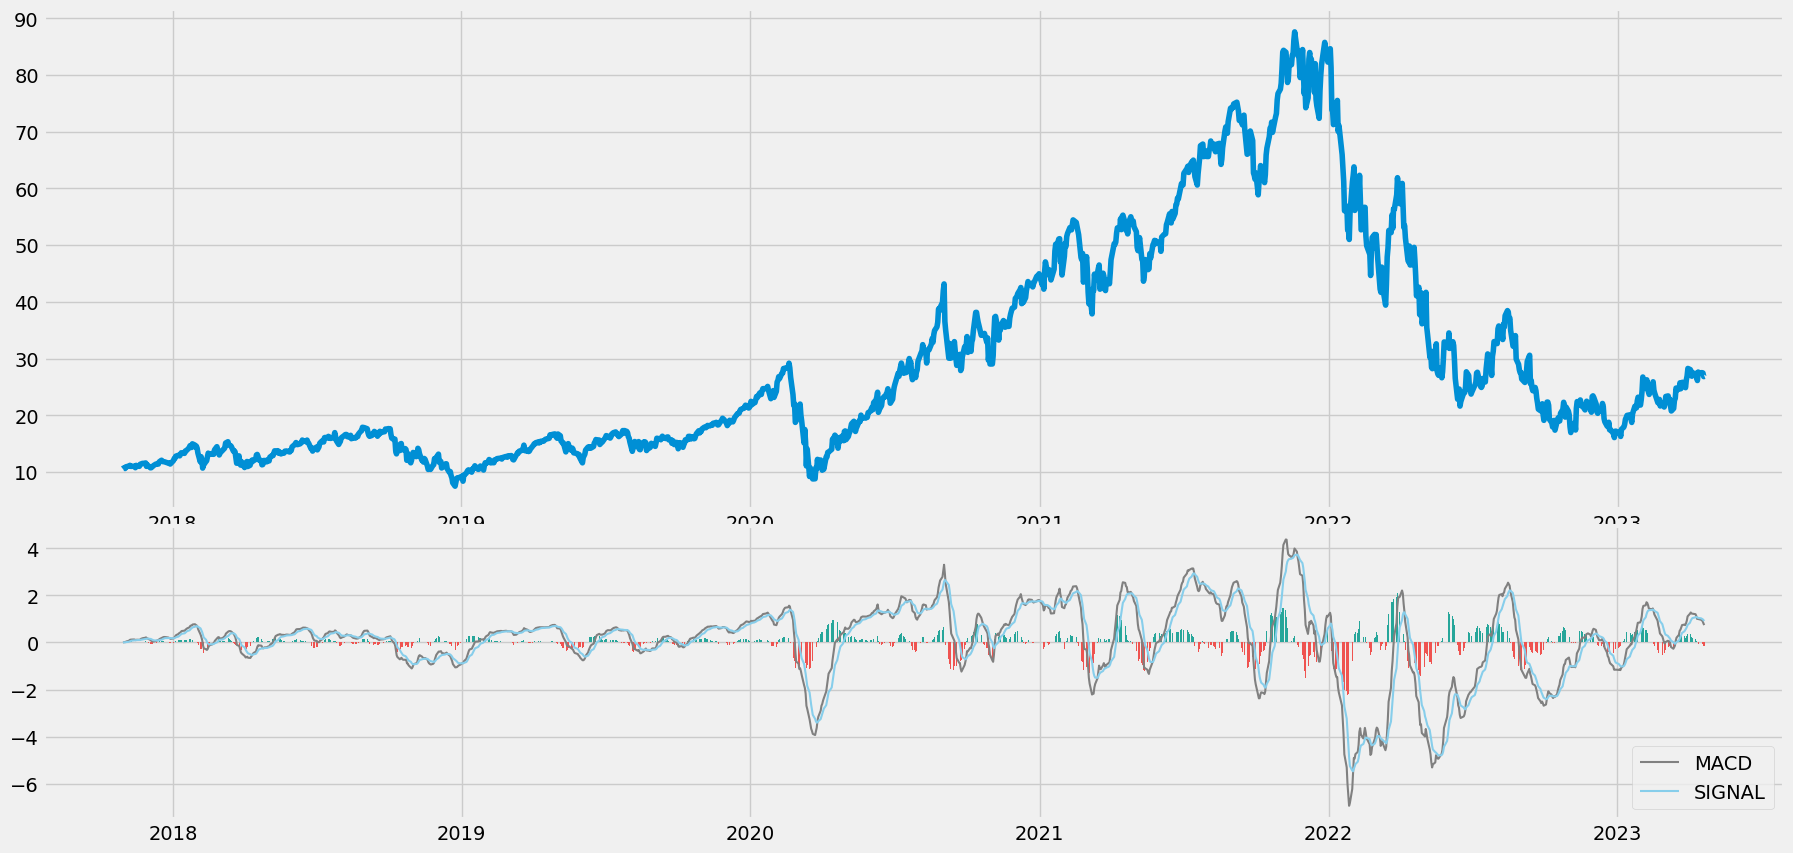

In [8]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(tickerDf['Close'], macd_test['macd'], macd_test['signal'], macd_test['hist'])

## Step-5: Creating the Trading Strategy

In [9]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'})
    macd_signal.index = tickerDf.index
    
    return buy_price, sell_price, macd_signal


## Step-6: Plotting the Trading Lists

NameError: name 'buy_price' is not defined

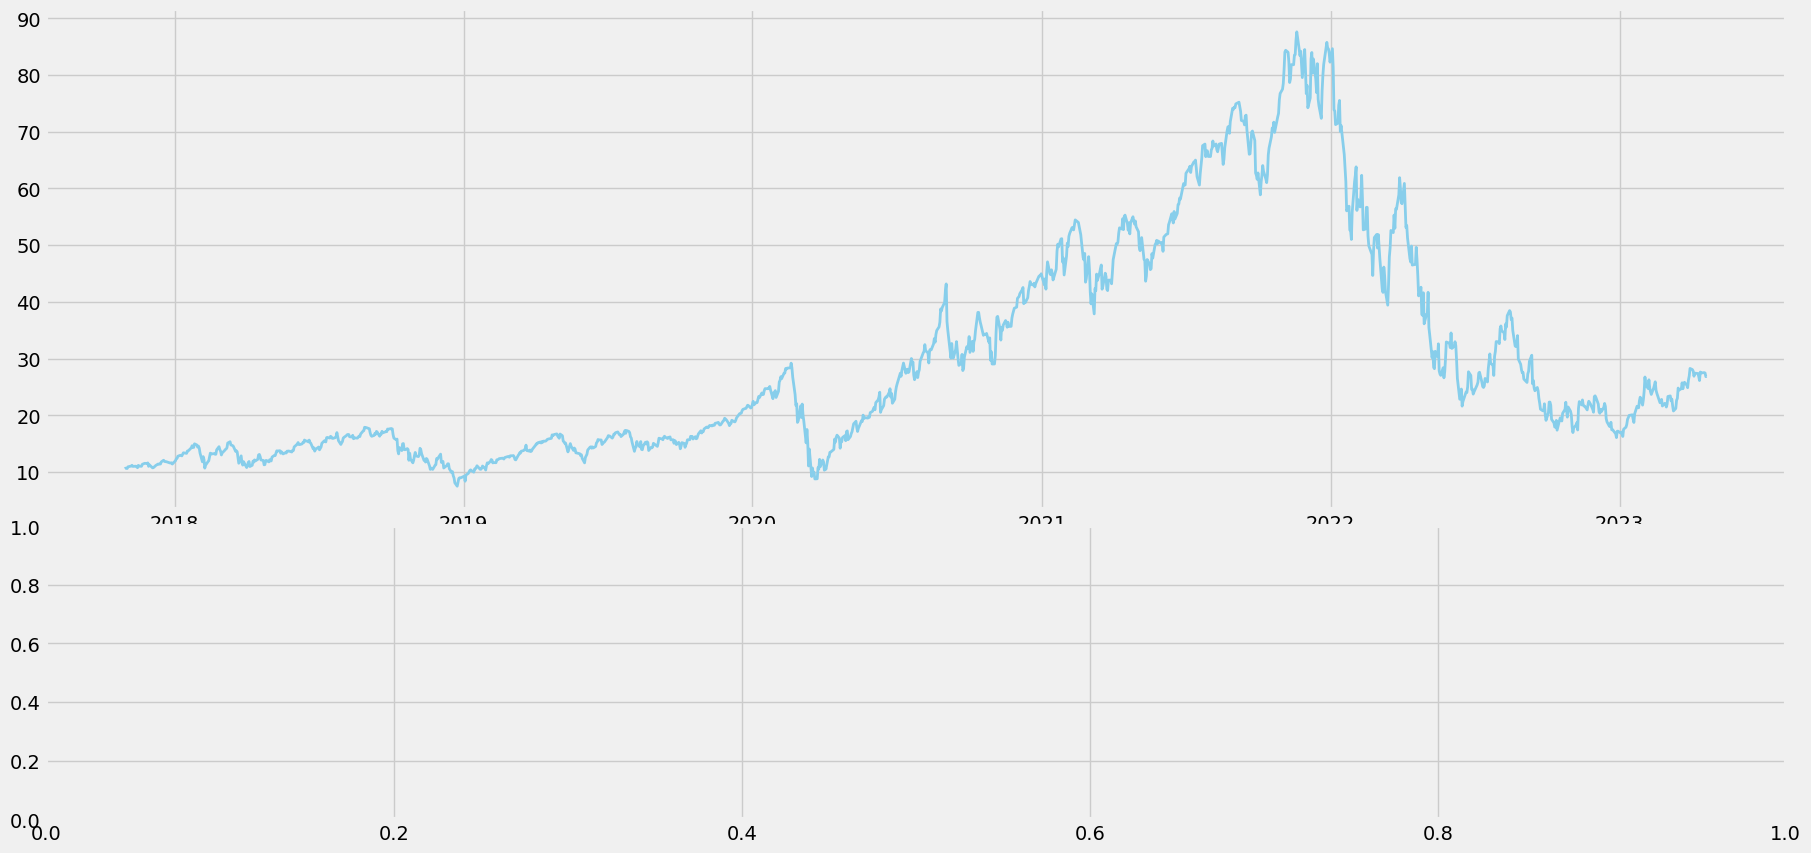

In [10]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(tickerDf['Close'], color = 'skyblue', linewidth = 2, label = 'TICKER')
ax1.plot(tickerDf.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(tickerDf.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('MACD SIGNALS')
ax2.plot(macd_test['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(macd_test['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(macd_test)):
    if str(macd_test['hist'][i])[0] == '-':
        ax2.bar(macd_test.index[i], macd_test['hist'][i], color = '#ef5350')
    else:
        ax2.bar(macd_test.index[i], macd_test['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

## Step-7: Creating our Position